# Análisis exploratorio de incidencia delictiva en México

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [82]:
df = pd.read_csv('delitos.csv', encoding='latin-1')
poblacion = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='latin-1')


In [83]:
df.columns


Index(['anio', 'clave_ent', 'entidad', 'tipo_de_delito', 'nombre_mes', 'fecha',
       'frecuencia'],
      dtype='object')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [84]:
df['fecha'] = pd.to_datetime(df['fecha'])
estados = ['Aguascalientes', 'Baja California', 'Tamaulipas']
df_filtro = df[
    (df['entidad'].isin(estados)) &
    (df['tipo_de_delito'] == 'Homicidio doloso')
].copy()
df['tipo_de_delito'].unique()


array(['Aborto', 'Abuso de confianza', 'Abuso sexual', 'Acoso sexual',
       'Allanamiento de morada', 'Amenazas', 'Contra el medio ambiente',
       'CorrupciÃ³n de menores', 'DaÃ±o a la propiedad',
       'Delitos cometidos por servidores pÃºblicos', 'Despojo',
       'Electorales', 'EvasiÃ³n de presos', 'ExtorsiÃ³n', 'Falsedad',
       'FalsificaciÃ³n', 'Feminicidio', 'Fraude', 'Homicidio',
       'Hostigamiento sexual', 'Incesto',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Lesiones', 'Narcomenudeo', 'Otros delitos contra el patrimonio',
       'Otros delitos contra la familia',
       'Otros delitos contra la sociedad',
       'Otros delitos del Fuero ComÃºn',
       'Otros delitos que atentan contra la libertad personal',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Rapto', 'Robo', 'Secuestro', 'Trata de personas',
       'TrÃ¡fico de me

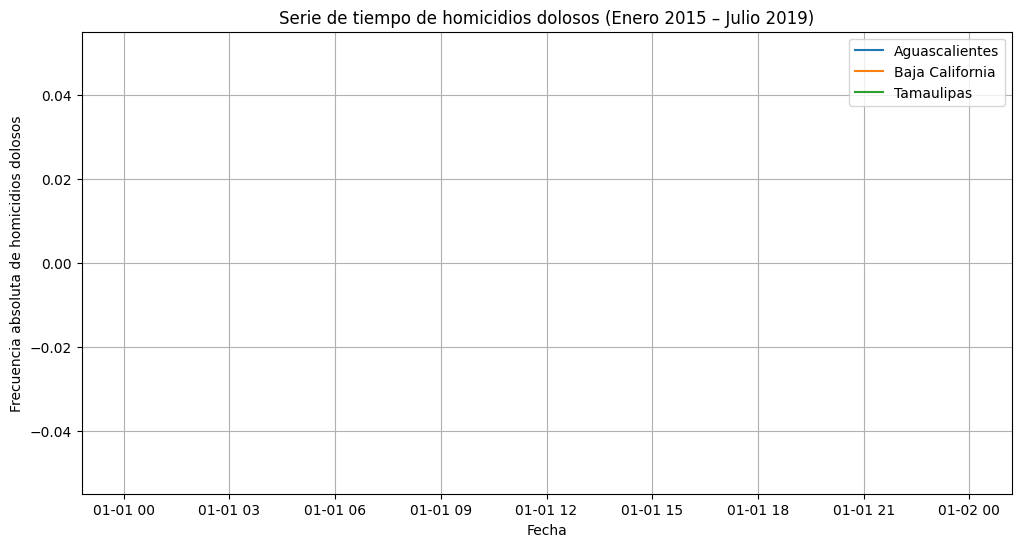

In [85]:
df_filtro = df_filtro[
    (df_filtro['fecha'] >= '2015-01-01') &
    (df_filtro['fecha'] <= '2019-07-31')
]
df_ts = (
    df_filtro
    .groupby(['fecha', 'entidad'], as_index=False)['frecuencia']
    .sum()
)
plt.figure(figsize=(12,6))

for estado in estados:
    data_estado = df_ts[df_ts['entidad'] == estado]
    plt.plot(
        data_estado['fecha'],
        data_estado['frecuencia'],
        label=estado
    )

plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta de homicidios dolosos')
plt.title('Serie de tiempo de homicidios dolosos (Enero 2015 – Julio 2019)')
plt.legend()
plt.grid(True)
plt.show()


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

1

In [86]:
df = pd.read_csv('delitos.csv', encoding='latin-1')
df['fecha'] = pd.to_datetime(df['fecha'])
homicidios_colima_2018 = df[
    (df['entidad'] == 'Colima') &
    (df['tipo_de_delito'] == 'Homicidio') &
    (df['anio'] == 2018)
]['frecuencia'].sum()

homicidios_colima_2018

np.float64(726.0)

2

In [87]:
robos_vehiculo_2019 = df[
    (df['tipo_de_delito'] == 'Robo') &
    (df['anio'] == 2019)
]['frecuencia'].sum()

robos_vehiculo_2019

np.float64(766096.0)

3

In [88]:
suma_hom_fem_por_anio = (
    df[df['tipo_de_delito'].isin(['Homicidio doloso', 'Feminicidio'])]
    .groupby('anio')['frecuencia']
    .sum()
    .reset_index()
)

suma_hom_fem_por_anio


,anio,frecuencia
0,2015,413.0
1,2016,608.0
2,2017,744.0
3,2018,899.0
4,2019,944.0
5,2020,947.0
6,2021,981.0
7,2022,961.0
8,2023,832.0
9,2024,401.0


4


In [89]:
feminicidios_por_mes = (
    df[df['tipo_de_delito'] == 'Feminicidio']
    .groupby('nombre_mes')['frecuencia']
    .sum()
    .reset_index()
)

feminicidios_por_mes.sort_values('frecuencia', ascending=False).head(1)

,nombre_mes,frecuencia
6,junio,734.0


5

In [90]:
feminicidios_anio_estado = (
    df[df['tipo_de_delito'] == 'Feminicidio']
    .groupby(['anio', 'entidad'])['frecuencia']
    .sum()
    .reset_index()
)

feminicidios_anio_estado.sort_values(
    'frecuencia',
    ascending=False
).head(1)

,anio,entidad,frecuencia
176,2020,MÃ©xico,151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

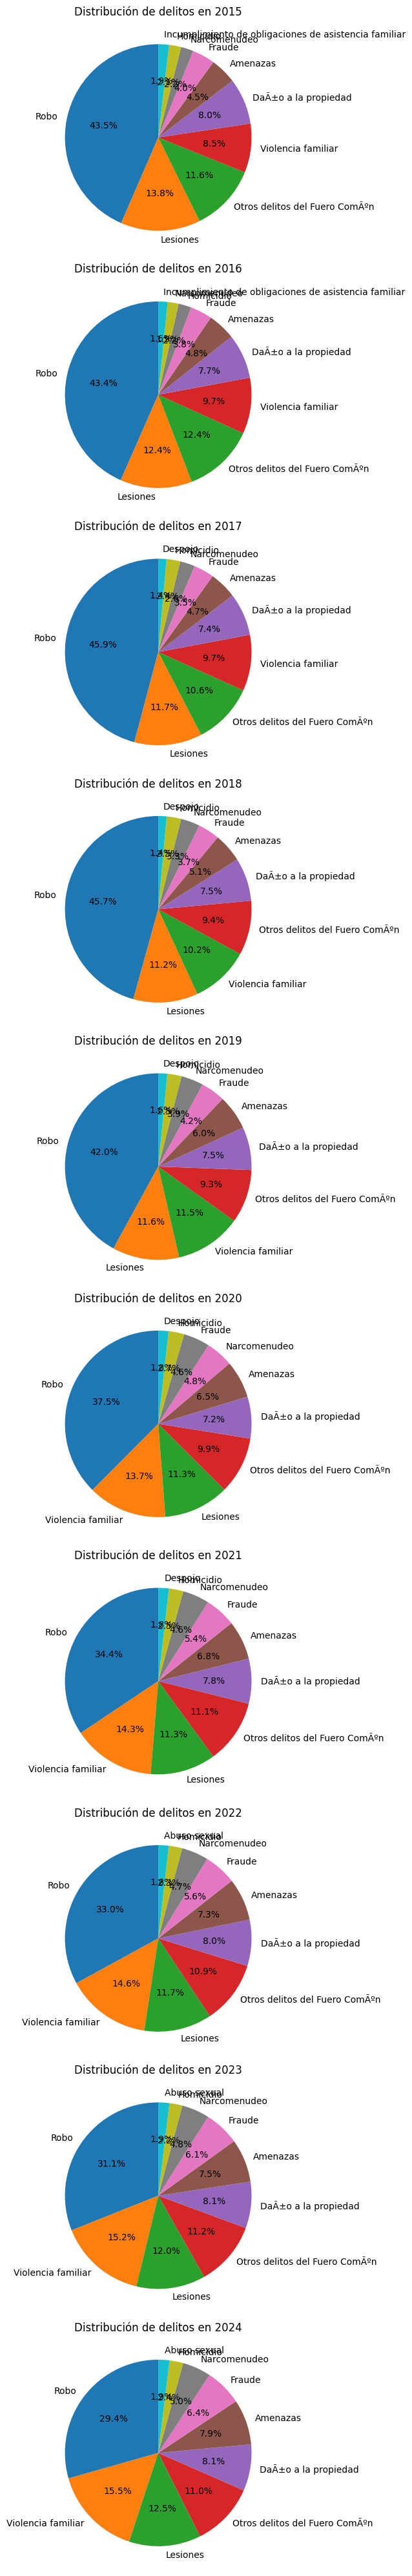

In [91]:
delitos_por_anio = (
    df.groupby(['anio', 'tipo_de_delito'])['frecuencia']
    .sum()
    .reset_index()
)

# Obtener años
anios = delitos_por_anio['anio'].unique()

# Crear subplots
fig, axes = plt.subplots(
    nrows=len(anios),
    ncols=1,
    figsize=(8, 4 * len(anios))
)

# Si solo hay un año
if len(anios) == 1:
    axes = [axes]

# Graficar
for ax, anio in zip(axes, anios):
    
    datos_anio = delitos_por_anio[
        delitos_por_anio['anio'] == anio
    ].sort_values('frecuencia', ascending=False).head(10)
    
    ax.pie(
        datos_anio['frecuencia'],
        labels=datos_anio['tipo_de_delito'],
        autopct='%1.1f%%',
        startangle=90
    )
    
    ax.set_title(f'Distribución de delitos en {anio}')

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [ ]:
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)


In [ ]:
df['anio'] = df['anio'].astype(int)
df['clave_ent'] = df['clave_ent'].astype(int)
df['frecuencia'] = df['frecuencia'].astype(float)
df['fecha'] = pd.to_datetime(df['fecha'])

delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)


In [129]:
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
delitos_totales = (
    df.groupby(['clave_ent', 'anio'])['frecuencia']
    .sum()
    .reset_index()
)
